In [1]:
%matplotlib inline

from __future__ import division

import os, sys
import numpy as np
import pandas as pd

import matplotlib.pylab as pl
from IPython.display import display, Image


/Users/Olivier/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# A - Model Description
## 1- Neuron Activation Function
### Example: Sigmoid Function

\begin{eqnarray} 
  \sigma(z) = \frac{1}{1+e^{-z}}
\end{eqnarray}

#### Property

\begin{eqnarray} 
  \frac{\partial \sigma}{\partial z} = \sigma(z) * (1-\sigma(z))
\end{eqnarray}


In [2]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

def sigmoid_prime_from_output(output):
    """using property above"""
    return output*(1-output)

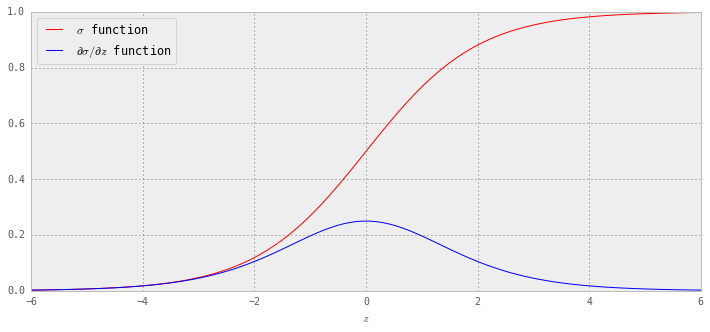

In [3]:
x = np.linspace(-6, 6, 100)
y = sigmoid(x)
y_prime = sigmoid_prime(x)
pl.figure(figsize=(12, 5))
pl.plot(x, y, 'r-', label='$\sigma$ function')
pl.plot(x, y_prime, 'b-', label='$\partial \sigma / \partial z$ function')
pl.legend(loc='upper left')
pl.xlabel('$z$');

## 2 - Network Architecture
### General

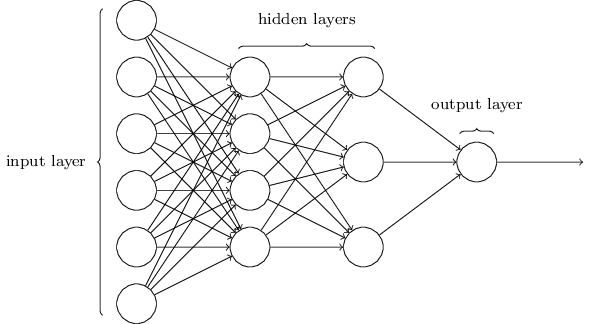

In [4]:
Image(filename=os.path.join('data', 'nnet0.png'))

### Weights

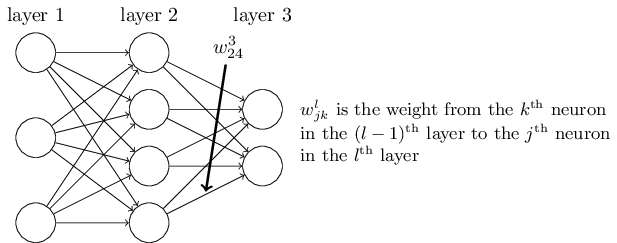

In [5]:
Image(filename=os.path.join('data', 'nnet1.png'))

### Biases

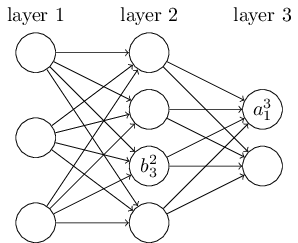

In [6]:
Image(filename=os.path.join('data', 'nnet2.png'))

### Output of a neuron

\begin{eqnarray} 
  a^{l}_j = \sigma\left( \sum_k w^{l}_{jk} a^{l-1}_k + b^l_j \right)
\end{eqnarray}

Matrix form

\begin{eqnarray} 
  a^{l} = \sigma(w^l a^{l-1}+b^l)
\end{eqnarray}

### Input in a neuron

\begin{eqnarray} 
    z^l_j = \sum_k w^l_{jk} a^{l-1}_k+b^l_j
\end{eqnarray}

Matrix form

\begin{eqnarray} 
  w^l a^{l-1}+b^l
\end{eqnarray}


## 3 - Cost Function

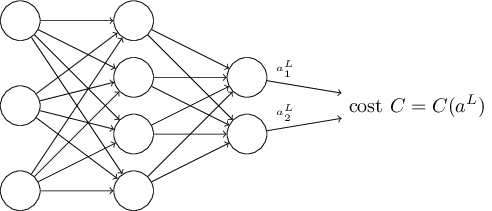

In [7]:
Image(filename=os.path.join('data', 'nnet3.png'))


### Definition
For a single training example

\begin{eqnarray}
  input & = & x = z^0 \\
  output & = & y \\ 
  predicted\ output & = & a^L \\ 
\end{eqnarray}


\begin{eqnarray}
  C = \frac{1}{2} \|y-a^L\|^2 = \frac{1}{2} \sum_j (y_j-a^L_j)^2,
\end{eqnarray}

## 4 - Back propagation equations
For a single training example
\begin{eqnarray}
  input & = & x = z^0 \\
  output & = & y \\ 
  predicted\ output & = & a^L \\ 
\end{eqnarray}

### Error definition

\begin{eqnarray} 
  \delta^l_j = \frac{\partial C}{\partial z^l_j}
\end{eqnarray}

### Error at output layer

\begin{eqnarray}
  \delta^L_j = \frac{\partial C}{\partial z^L_j}
     = \sum_k \frac{\partial C}{\partial a^L_k} \frac{\partial a^L_k}{\partial z^L_j}
     = \frac{\partial C}{\partial a^L_j} \frac{\partial a^L_j}{\partial z^L_j}
     = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j)
\end{eqnarray}

Matrix form

\begin{eqnarray} 
  \delta^L = (a^L-y) \odot \sigma'(z^L).
\tag{1} \end{eqnarray}

### Error in previous layers

\begin{eqnarray}
  \delta^l_j & = & \frac{\partial C}{\partial z^l_j} \\
  & = & \sum_k \frac{\partial C}{\partial z^{l+1}_k} \frac{\partial z^{l+1}_k}{\partial z^l_j} \\ 
  & = & \sum_k \frac{\partial z^{l+1}_k}{\partial z^l_j} \delta^{l+1}_k
\end{eqnarray}

With

\begin{eqnarray}
  z^{l+1}_k = \sum_j w^{l+1}_{kj} a^l_j +b^{l+1}_k = \sum_j w^{l+1}_{kj} \sigma(z^l_j) +b^{l+1}_k
\end{eqnarray}

Differentiating

\begin{eqnarray}
  \frac{\partial z^{l+1}_k}{\partial z^l_j} = w^{l+1}_{kj} \sigma'(z^l_j)
\end{eqnarray}

Substituting

\begin{eqnarray}
  \delta^l_j = \sum_k w^{l+1}_{kj}  \delta^{l+1}_k \sigma'(z^l_j)
\end{eqnarray}

Matrix form

\begin{eqnarray} 
  \delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^l)
\tag{2} \end{eqnarray}

### Cost rate of change wrt bias

\begin{eqnarray}
\frac{\partial C}{\partial b^l_j}
= \sum_k \frac{\partial C}{\partial z^l_k} \frac{\partial z^l_k}{\partial b^l_j}
= \sum_k \frac{\partial z^l_k}{\partial b^l_j} \delta^l_k 
= \delta^l_j
\end{eqnarray}

Matrix form

\begin{eqnarray}
\frac{\partial C}{\partial b^l} = \delta^l
\tag{3}\end{eqnarray}


### Cost rate of change wrt weight


\begin{eqnarray}
\frac{\partial C}{\partial w^l_{jk}}
= \sum_q \frac{\partial C}{\partial z^l_q} \frac{\partial z^l_q}{\partial w^l_{jk}}
= \sum_q \delta^l_q \frac{\partial \left[ \sum_i w^l_{qi} a^{l—1}_i +b^l_q \right]}{\partial w^l_{jk}} 
= \delta^l_j a^{l-1}_k
\end{eqnarray}

Compact form

\begin{eqnarray}
  \frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j = a_{in} \delta_{out}
\tag{4}\end{eqnarray}


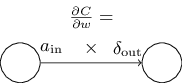

In [8]:
Image(filename=os.path.join('data', 'nnet4.png'))

# B - Toy Neural Nets
## 1 - No hidden layer, No bias
Network composed of
+ 3 input neurons (Layer 0)
+ 1 output neuron (Layer 1)  

In [9]:
# input dataset
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]]).T
print 'number of samples = {}'.format(X.shape[1])
X

number of samples = 4


array([[0, 0, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 1, 1]])

In [10]:
# output dataset
y = np.array([0,0,1,1])
y

array([0, 0, 1, 1])

In [11]:
# seed random numbers to make calculation deterministic
np.random.seed(1)

# initialize weights randomly with mean 0
w1 = 2*np.random.random([1, 3])-1
w1

array([[-0.16595599,  0.44064899, -0.99977125]])

In [12]:
show = False
N = 100000

for i in xrange(N):
    if show: print '\ni={}'.format(i)
    
    # w1
    if show: print 'w1 before =\n{}'.format(w1)
    
    # forward propagation
    layer0 = X
    if show: print 'layer0 =\n{}'.format(layer0)
    z1 = np.dot(w1, layer0)
    if show: print 'z1 =\n{}'.format(z1)
    layer1 = sigmoid(z1)
    if show: print 'layer1 =\n{}'.format(layer1)
    
    # error
    error = layer1 - y
    if (i%10000)==0:
        print 'i={:7d}\terror = {}'.format(i, np.mean(np.abs(error)))
    if show: print 'error =\n{}'.format(error)
    
    # delta last layer
    delta1 = error * sigmoid_prime_from_output(layer1)
    if show: print 'delta1 =\n{}'.format(delta1)
    
    # derivative cost wrt weight
    if show: print 'delta1.T =\n{}'.format(delta1.T)
    w1_derivative = np.dot(layer0, delta1.T).T
    if show: print 'w1_derivative =\n{}'.format(w1_derivative)
    
    # update weight: gradient descent alpha=1
    w1 -= w1_derivative
    if show: print 'w1 after =\n{}'.format(w1)

print '\nerror after training =\n{}'.format(np.mean(np.abs(error)))
print 'w1 after training =\n{}'.format(w1)


i=      0	error = 0.517208275438
i=  10000	error = 0.00795484506673
i=  20000	error = 0.0055978239634
i=  30000	error = 0.00456086918013
i=  40000	error = 0.00394482243339
i=  50000	error = 0.00352530883742
i=  60000	error = 0.00321610234673
i=  70000	error = 0.00297605968522
i=  80000	error = 0.00278274003022
i=  90000	error = 0.0026227273927

error after training =
0.00248745653557
w1 after training =
[[ 12.00870061  -0.2044116   -5.8002822 ]]


## 2 - Hidden layer, No bias, dropout
Network composed of
+ 3 input neurons (Layer 0)
+ [variable size] hidden neurons (Layer 1)
  + Dropout applied
+ 1 output neuron (Layer 2)  

In [13]:
# input dataset
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]]).T
print 'number of samples = {}'.format(X.shape[1])
X

number of samples = 4


array([[0, 0, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 1, 1]])

In [14]:
# output dataset
y = np.array([0, 1, 1, 0])
y

array([0, 1, 1, 0])

In [15]:
# seed random numbers to make calculation deterministic
np.random.seed(1)

# initialize weights randomly with mean 0
w1 = 2*np.random.random([4, 3])-1
w2 = 2*np.random.random([1, 4])-1
print 'w1 =\n{}'.format(w1)
print 'w2 =\n{}'.format(w2)


w1 =
[[-0.16595599  0.44064899 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]
 [-0.62747958 -0.30887855 -0.20646505]
 [ 0.07763347 -0.16161097  0.370439  ]]
w2 =
[[-0.5910955   0.75623487 -0.94522481  0.34093502]]


In [19]:
show = False
show2 = False
N = 60000*1+0
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# alphas = [10]

nb_hidden = 32 #4 32
dropout_active, dropout_pct = False, 0.10


for alpha in alphas:
    print '\n\n*********training with alpha = {}'.format(alpha)

    # seed random numbers to make calculation deterministic
    np.random.seed(1)
    # initialize weights randomly with mean 0
    #w1 = 2*np.random.random([4, 3])-1
    w1 = (2*np.random.random([3, nb_hidden])-1).T # debugging
    w2 = 2*np.random.random([1, nb_hidden])-1

    # init direction changes recording
    prev_w1_weight_update = np.zeros_like(w1)
    prev_w2_weight_update = np.zeros_like(w2)
    w1_direction_count = np.zeros_like(w1)
    w2_direction_count = np.zeros_like(w2)

    
    for i in xrange(N):
        if show: print '\ni={}'.format(i)

        # w1
        if show: print 'w1 before =\n{}'.format(w1)
        if show: print 'w2 before =\n{}'.format(w2)

        # forward propagation
        layer0 = X.copy()
        if show: print 'layer0 =\n{}'.format(layer0)
        z1 = np.dot(w1, layer0)
        if show: print 'z1 =\n{}'.format(z1)
        layer1 = sigmoid(z1)
        if show: print 'layer1 =\n{}'.format(layer1)

        # dropout
        if(dropout_active):
            layer1 *= np.random.binomial([np.ones([nb_hidden, X.shape[1]])], 1-dropout_pct)[0] / (1-dropout_pct)
        if show: print 'layer1 post dropout =\n{}'.format(layer1)
            
        z2 = np.dot(w2, layer1)
        if show: print 'z2 =\n{}'.format(z2)
        layer2 = sigmoid(z2)
        if show: print 'layer2 =\n{}'.format(layer2)

        # error
        error = layer2 - y
        if show: print 'error =\n{}'.format(error)
        if (i%10000)==0:
            print 'i={:7d}\terror = {}'.format(i, np.mean(np.abs(error)))

        # delta last layer
        delta2 = error * sigmoid_prime_from_output(layer2)
        if show: print 'delta2 =\n{}'.format(delta2)

        delta1 = np.dot(w2.T, delta2)*sigmoid_prime_from_output(layer1)
        if show: print 'delta1 =\n{}'.format(delta1)

        # derivative cost wrt weight
        if show: print 'delta1.T =\n{}'.format(delta1.T)
        w1_derivative = np.dot(layer0, delta1.T).T
        if show: print 'w1_derivative =\n{}'.format(w1_derivative)

        if show: print 'delta2.T =\n{}'.format(delta2.T)
        w2_derivative = np.dot(layer1, delta2.T).T
        if show: print 'w2_derivative =\n{}'.format(w2_derivative)

        # update weight: gradient descent alpha=1
        w1 += -alpha * w1_derivative
        if show: print 'w1 after =\n{}'.format(w1)
        w2 += -alpha * w2_derivative
        if show: print 'w2 after =\n{}'.format(w2)

        # record direction changes
        if(i > 0):
            w1_direction_count += np.abs((w1_derivative > 0) ^ (prev_w1_derivative > 0))
            w2_direction_count += np.abs((w2_derivative > 0) ^ (prev_w2_derivative > 0)) 

        prev_w1_derivative = w1_derivative
        prev_w2_derivative = w2_derivative
            
    print 'error after training = {}\n'.format(np.mean(np.abs(error)))
    if show2: print 'w1 after training =\n{}'.format(w1)
    if show2: print 'w1 update direction changes =\n{}'.format(w1_direction_count)
    if show2: print 'w2 after training =\n{}'.format(w2)
    if show2: print 'w2 update direction changes =\n{}'.format(w2_direction_count)




*********training with alpha = 0.001
i=      0	error = 0.496439922501
i=  10000	error = 0.491049468129
i=  20000	error = 0.484976307027
i=  30000	error = 0.477830678793
i=  40000	error = 0.46903846539
i=  50000	error = 0.458029258565
error after training = 0.444279056511



*********training with alpha = 0.01
i=      0	error = 0.496439922501
i=  10000	error = 0.356379061648
i=  20000	error = 0.146939845465
i=  30000	error = 0.0880156127416
i=  40000	error = 0.065147819275
i=  50000	error = 0.0529658087026
error after training = 0.0453045912903



*********training with alpha = 0.1
i=      0	error = 0.496439922501
i=  10000	error = 0.0305404908386
i=  20000	error = 0.0190638725334
i=  30000	error = 0.0147643907296
i=  40000	error = 0.0123892429905
i=  50000	error = 0.0108421669738
error after training = 0.00973682438271



*********training with alpha = 1
i=      0	error = 0.496439922501
i=  10000	error = 0.00736052234249
i=  20000	error = 0.00497251705039
i=  30000	error = 0.00396863